# Timepix Data Analysis

## TOF data

### Import few libraries

In [9]:
from timepixhdf.run import TimePixRun, Filter
from timepixhdf.tof import Tof
import matplotlib.pyplot as plt

In [10]:
timepix_hdf_filename = "./data/run_0178_20191213-1254.hdf5"
#timepix_hdf_filename = "./data/timepix_ion-run6_CO2_0000_20210507-1321.hdf5"
timepix_run = TimePixRun(timepix_hdf_filename)

### Extract data
Timepix data has two types of events
1. raw
2. centroid

We need to pass `event type`.

In [11]:
timepix_dict = timepix_run.get_events("raw", ["tof"], Filter("tof", 10.0E-06, 17.0E-06))
tof = timepix_dict["tof"]

# Now plot tof data. 'Tof' function is just a matplotlib script.
tofl = Tof(tof, time_unit="micro")

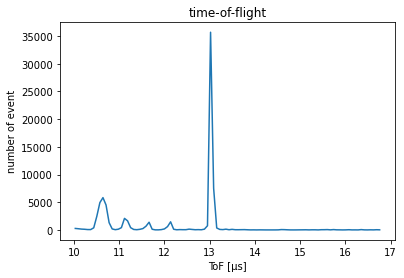

In [12]:
tofl.show()

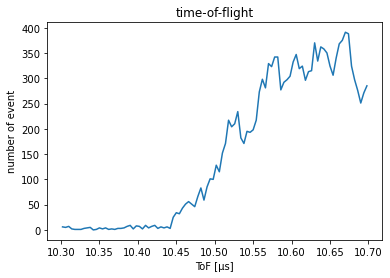

In [13]:
timepix_dict = timepix_run.get_events("raw", ["tof"], Filter("tof", 10.3E-06, 10.7E-06))
tof = timepix_dict["tof"]
Tof(tof, time_unit="micro").show()

## VMI data

In [6]:
from timepixhdf.vmi import VmiImage

In [7]:
#timepix_dict = timepix_run.get_events("centroided", ["x", "y"], fragment="fragments,test_ion")
timepix_dict = timepix_run.get_events("centroided", ["x", "y"], Filter("tof", 10.3E-06, 10.7E-06), Filter("x", 0, 255), Filter("y", 0, 255))
x, y = timepix_dict["x"], timepix_dict["y"]

### Please set conditions to process and invert vmi images.

Use these conditions as default.

```
center = [128, 128]
angle = 0
crop = False
radius = 256
rect = False
table_path = None
```

In [8]:
# Intial Conditions
center = [128, 128]
angle = 0
crop = False
radius = 256
rect = False
table_path = None



recognized from command line:



input  file : ./Images/vmi_image_proc         

output file : DefaultQ.dat                    

center      :   128  128

method      : use indices IZ, IX              

weights     : 1111

radius      :    0

scale       : 0.100000E+01



input  matrix is  256 by  256

center indices located at  128  128

output matrix is  127 by  127

 


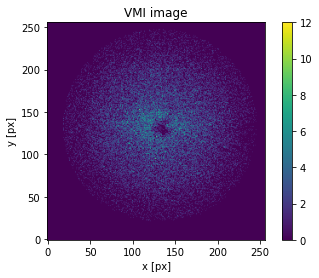

In [9]:
vmi_image = VmiImage(x,y, center, angle,
                     crop, radius, rect, table_path)
vmi_image.show()

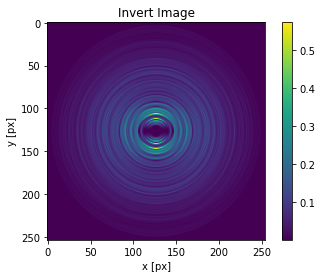

In [10]:
vmi_image.show_mev()

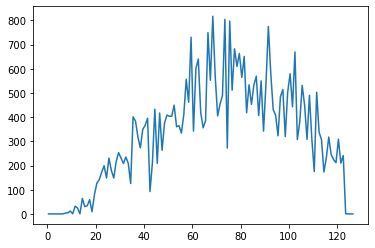

In [11]:
plt.plot(vmi_image.mexdis[:,0], vmi_image.mexdis[:,1])